<a href="https://colab.research.google.com/github/AnIsAsPe/LDA-TopicModeling_python/blob/main/Notebooks/Modelos_generativos_de_lenguaje.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 8.2 MB/s eta 0:00:00


In [2]:

import pandas as pd
import numpy as np

import re               # módulo operaciones expresiones regulares
import operator

import contractions
from collections import Counter
import random

import matplotlib.pyplot as plt


## Funciones

In [3]:
def leer_libro(archivo_txt):
  '''funcion para leer un archivo en formato txt'''
  with open(archivo_txt, "r", encoding="utf8") as f:
    texto = f.read()
    texto = texto.replace("\n", "").replace("\r", "")
  return texto

In [4]:
def limpiar_texto(texto):
  '''Función para convertir a minúsculas, quitar signos de puntuación,
  números y tildes'''
  #quitar contracciones
  texto = contractions.fix(texto)

  #Convertir en mínusculas
  texto = texto.lower()

  #Quitar puntuación y números
  texto = re.sub('[^ña-z]+', ' ', texto)

  return texto

In [5]:
def obtener_ngramas(texto, N):
    palabras_en_texto = texto.split()

    ngramas = (tuple(palabras_en_texto[i:i+N]) for i in range(len(palabras_en_texto)-N+1))
    return ngramas

# Leer y limpiar texto

obtener archivo [txt](https://github.com/sharanyavb/harry-potter/blob/master/Books_Text/HP1.txt)

In [6]:
!wget https://raw.githubusercontent.com/sharanyavb/harry-potter/master/Books_Text/HP1.txt

--2023-09-18 20:56:34--  https://raw.githubusercontent.com/sharanyavb/harry-potter/master/Books_Text/HP1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 492006 (480K) [text/plain]
Saving to: ‘HP1.txt’

HP1.txt             100%[===================>] 480.47K  --.-KB/s    in 0.02s   

2023-09-18 20:56:34 (24.4 MB/s) - ‘HP1.txt’ saved [492006/492006]



In [7]:
libro = leer_libro('/content/HP1.txt')

libro[:1500]

'THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere. The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn’t think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t P

In [8]:
# lista con cadenas correspondientes al pie de página.
borrar = ['Page | {} Harry Potter and the Philosophers Stone - J.K. Rowling'.format(i)\
         for i in range(2,347)]

for tx in borrar:
    libro = libro.replace(tx, '')

libro[:1500]

'THE BOY WHO LIVED Mr. and Mrs. Dursley, of number four, Privet Drive, were proud to say that they were perfectly normal, thank you very much. They were the last people you’d expect to be involved in anything strange or mysterious, because they just didn’t hold with such nonsense. Mr. Dursley was the director of a firm called Grunnings, which made drills. He was a big, beefy man with hardly any neck, although he did have a very large mustache. Mrs. Dursley was thin and blonde and had nearly twice the usual amount of neck, which came in very useful as she spent so much of her time craning over garden fences, spying on the neighbors. The Dursley s had a small son called Dudley and in their opinion there was no finer boy anywhere. The Dursleys had everything they wanted, but they also had a secret, and their greatest fear was that somebody would discover it. They didn’t think they could bear it if anyone found out about the Potters. Mrs. Potter was Mrs. Dursley’s sister, but they hadn’t  

In [9]:
libro_limpio = limpiar_texto(libro)
libro_limpio[:1500]


'the boy who lived mr and mrs dursley of number four privet drive were proud to say that they were perfectly normal thank you very much they were the last people you would expect to be involved in anything strange or mysterious because they just did not hold with such nonsense mr dursley was the director of a firm called grunnings which made drills he was a big beefy man with hardly any neck although he did have a very large mustache mrs dursley was thin and blonde and had nearly twice the usual amount of neck which came in very useful as she spent so much of her time craning over garden fences spying on the neighbors the dursley s had a small son called dudley and in their opinion there was no finer boy anywhere the dursleys had everything they wanted but they also had a secret and their greatest fear was that somebody would discover it they did not think they could bear it if anyone found out about the potters mrs potter was mrs dursley s sister but they had not met for several years

# Distribución de probabilidad de las palabras en el libro

In [10]:
Counter(libro_limpio.split())   # Counter es una "colección" donde los elementos encontrados en
                                # cualquier objeto iterable son guardados como claves de un
                                # diccionario y el conteo como valores

Counter({'the': 3651,
         'boy': 85,
         'who': 200,
         'lived': 9,
         'mr': 81,
         'and': 1935,
         'mrs': 46,
         'dursley': 57,
         'of': 1311,
         'number': 17,
         'four': 36,
         'privet': 16,
         'drive': 20,
         'were': 332,
         'proud': 7,
         'to': 1872,
         'say': 75,
         'that': 688,
         'they': 690,
         'perfectly': 5,
         'normal': 10,
         'thank': 9,
         'you': 1037,
         'very': 172,
         'much': 76,
         'last': 84,
         'people': 96,
         'would': 421,
         'expect': 13,
         'be': 366,
         'involved': 5,
         'in': 967,
         'anything': 72,
         'strange': 23,
         'or': 109,
         'mysterious': 6,
         'because': 91,
         'just': 180,
         'did': 297,
         'not': 1014,
         'hold': 12,
         'with': 416,
         'such': 21,
         'nonsense': 4,
         'was': 1262,
         'd

In [11]:
palabras_frecuencia = Counter(libro_limpio.split())
vocabulario = list(palabras_frecuencia.keys())
print('Palabras en el vocabulario de HP1: ', len(vocabulario))

Palabras en el vocabulario de HP1:  5704


Visualización de la probabilidad de ocurrencia de las 80 palabras más frecuentes

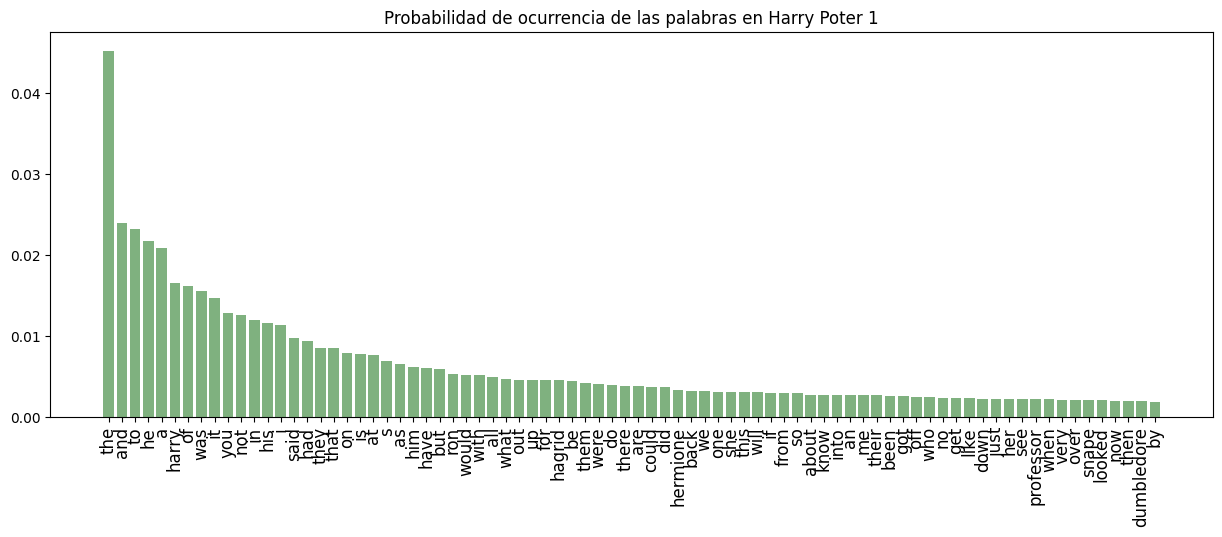

In [12]:
Probabilidad_palabra = {k : v /len(libro_limpio.split()) for k, v in palabras_frecuencia.most_common(80)}

x, y  = zip(*sorted(Probabilidad_palabra.items(),key=operator.itemgetter(1), reverse=True))

fig = plt.figure(figsize=(15,5))
plt.bar(x,y,
        color='darkgreen',
        alpha=0.5)
plt.xticks(rotation=90, fontsize=12)
plt.title('Probabilidad de ocurrencia de las palabras en Harry Poter 1')
plt.show()

# Generación de Texto con Distribución Uniforme

1. Declaramos una lista vacía donde guardaremos las palabras que tendra el texto
2. Escojemos la primera palabra de forma aleatoria con distribución uniforme **texto en negrita**

In [13]:
palabras = []  # inicializamos la lista de palabras

#  escojemos la primera palabra de manera aleatoriamente con distribución uniforme
palabra_selec = vocabulario[np.random.randint(0, len(vocabulario))]
palabras.append(palabra_selec)

' '.join(palabras)

'chased'

In [16]:
long = 100
for _ in range(long):
    palabra_selec = vocabulario[np.random.randint(0, len(vocabulario))]
    palabras.append(palabra_selec)

' '.join(palabras)

'chased cheerful gossiped moan granite kick shove haaa tasty normal crushing tureens excitedly phoenix monk meanin horny wristwatches underneath side african l bendy falling hungry finds smooth free disappointment bunches july grunnings ignore fer strangled velvety rocketed made muggles particularly haircut engulfed never driven indeed flanks bath ending orange broad boarded caretaker gives mystery sideways squat smooth til appearance cabbages describing packed confusion dashed scissors fumbling you ground marmalade argued mingled nah seize painfully howl grasping gown sausage phoning hog wanted past mess astronomy bitter pellets switch squeaky whistle pansy voicing types a alarm poke bodied smiled conjured shack coat cans resolution duels raise dunderhead silk damn value stomping term straying'

lo que sería equivalente a lo siguiente:

In [17]:
' '.join(np.random.choice(vocabulario,100))

'fondly astride smartly circe moon useless map paracelsus messin think stage sword ask beginners spotting bill drifted seeping breathing only ajar herbology overtaking student turban firsties believed shriek tell boomed leap stuck stove languages meet accept wizardry lace prickled angel removed thumbs potato bandages snoring blast mossy risky hooch smoother dives hammered dimpled chessmen best shouldn knee sing shake rivers informed lifting scene pleaded striped herbs england bulstrode mere scar platforms else nobody crazy hopped express wooden dates well gap behavior present clean hawk swung soaring streamed clean our weak hanging bishop promised lawns panic wormwood strong inches dursley phoning'

# Generación de Texto con distribucción de palabras en HP

In [18]:
' '.join(random.sample(libro_limpio.split(),100))    #Distribución en el libro

'in for he saw train and but would presents under you up potter you white that looked lights emptier tell long ages head going hermione anything have been leviosal a it attention table a and chuckled you all for violently before listen to tail into a rubeus snape and thought a said me filled hard dudley beard they only the her it crabbe a the to about yer put realize is the precisely s of all he bogies law a when his what he hedwig in yelled world temper no dog was under me a you brother tears face open'

# Generación de texto usando N Gramas

In [19]:
unigramas = palabras_frecuencia
print('Unigramas Unicos: ', len(unigramas), end='\n\n')
unigramas.most_common(30)

Unigramas Unicos:  5704



[('the', 3651),
 ('and', 1935),
 ('to', 1872),
 ('he', 1757),
 ('a', 1687),
 ('harry', 1336),
 ('of', 1311),
 ('was', 1262),
 ('it', 1186),
 ('you', 1037),
 ('not', 1014),
 ('in', 967),
 ('his', 936),
 ('i', 923),
 ('said', 794),
 ('had', 755),
 ('they', 690),
 ('that', 688),
 ('on', 637),
 ('is', 629),
 ('at', 625),
 ('s', 564),
 ('as', 526),
 ('him', 500),
 ('have', 491),
 ('but', 485),
 ('ron', 429),
 ('would', 421),
 ('with', 416),
 ('all', 399)]

In [20]:
bigramas = Counter(obtener_ngramas(libro_limpio, 2))
print('Bigramas Unicos: ', len(bigramas), end='\n\n')
bigramas.most_common(30)

Bigramas Unicos:  41298



[(('of', 'the'), 305),
 (('in', 'the'), 270),
 (('it', 'was'), 227),
 (('on', 'the'), 218),
 (('he', 'was'), 209),
 (('did', 'not'), 200),
 (('to', 'the'), 173),
 (('it', 'is'), 170),
 (('do', 'not'), 159),
 (('he', 'would'), 158),
 (('out', 'of'), 148),
 (('at', 'the'), 141),
 (('said', 'harry'), 137),
 (('he', 'had'), 135),
 (('i', 'am'), 130),
 (('harry', 's'), 113),
 (('to', 'be'), 110),
 (('said', 'ron'), 109),
 (('uncle', 'vernon'), 107),
 (('could', 'not'), 106),
 (('he', 'said'), 106),
 (('in', 'a'), 105),
 (('i', 'have'), 102),
 (('they', 'were'), 99),
 (('was', 'a'), 99),
 (('and', 'the'), 93),
 (('professor', 'mcgonagall'), 92),
 (('said', 'hagrid'), 90),
 (('going', 'to'), 89),
 (('he', 'is'), 88)]

In [21]:
trigramas = Counter(obtener_ngramas(libro_limpio,3))
trigramas.most_common(30)

[(('out', 'of', 'the'), 63),
 (('i', 'do', 'not'), 46),
 (('he', 'did', 'not'), 38),
 (('harry', 'and', 'ron'), 37),
 (('there', 'was', 'a'), 35),
 (('he', 'could', 'not'), 35),
 (('ron', 'and', 'hermione'), 33),
 (('do', 'not', 'know'), 31),
 (('it', 'was', 'a'), 28),
 (('one', 'of', 'the'), 27),
 (('in', 'front', 'of'), 25),
 (('you', 'know', 'who'), 23),
 (('they', 'did', 'not'), 22),
 (('seemed', 'to', 'be'), 22),
 (('harry', 'did', 'not'), 22),
 (('have', 'got', 'to'), 22),
 (('he', 'had', 'not'), 21),
 (('it', 'was', 'not'), 21),
 (('the', 'end', 'of'), 21),
 (('out', 'of', 'his'), 20),
 (('was', 'going', 'to'), 20),
 (('you', 'do', 'not'), 20),
 (('did', 'not', 'have'), 19),
 (('it', 'is', 'not'), 19),
 (('be', 'able', 'to'), 19),
 (('i', 'have', 'got'), 19),
 (('as', 'though', 'he'), 19),
 (('we', 'have', 'got'), 19),
 (('did', 'not', 'know'), 18),
 (('the', 'rest', 'of'), 18)]

## Crear textos basadas en la probabilidad de ocurrencia

In [22]:
def probabilidad_unigrama(token):
    if token not in unigramas:
        return 0
    return unigramas[token] / total_tokens

def probabilidad_bigrama(secuencia):
    if secuencia not in bigramas:
        return 0
    return bigramas[secuencia] / unigramas[secuencia[0]]

def probabilidad_trigrama(secuencia):
    if secuencia not in trigramas:
        return 0
    return trigramas[secuencia] / bigramas[secuencia[:2]]

def selecciona_siguiente_token(secuencia):
    lista_palabras_candidatos = []

    # Itera por todos los tokens del vocabulario
    # calculando la probabilidad de seleccionar la siguiente palabra
    for p in vocabulario:
        Prob1 = unigramas[p] / len(vocabulario)
        Prob2 = probabilidad_bigrama((secuencia[-1], p))
        Prob3 = probabilidad_trigrama((secuencia[-2], secuencia[-1], p)) if len(secuencia) >= 3 else 0

        # Usamos una interpolación lineal
        Probabilidad =  0.05*Prob1 + 0.35*Prob2 + 0.60*Prob3

        lista_palabras_candidatos.append((p, Probabilidad))

    # orenamos la lista de mayor a menor probabilidad
    lista_palabras_candidatos.sort(key=lambda x: x[1], reverse=True)
    return lista_palabras_candidatos[0][0]



In [27]:
palabras = []
longitud_texto = 100

#  escojemos la primera palabra de manera aleatoriamente con distribución uniforme
palabra_selec = vocabulario[np.random.randint(0, len(vocabulario))]
palabras.append(palabra_selec)

for _ in range(longitud_texto-1):
    palabra_selec = selecciona_siguiente_token(palabras)
    palabras.append(palabra_selec)
" ".join(palabras)

'relatives he was not going to be a bit of a large pink face not much room dudley was now so busy with the dursleys had never seen before were the only one who has gone dumbledore said harry and ron were still to come and have a good idea of harry s the only one who has gone dumbledore said harry and ron were still to come and have a good idea of harry s the only one who has gone dumbledore said harry and ron were still to come and have a good idea of harry s the'